In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("Dummy Data HSS.csv")
df = df.replace([np.inf, -np.inf], np.nan).dropna()#remove nan and infinity rows

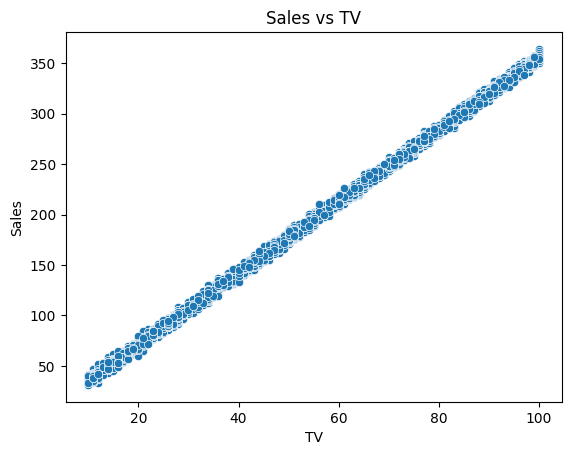

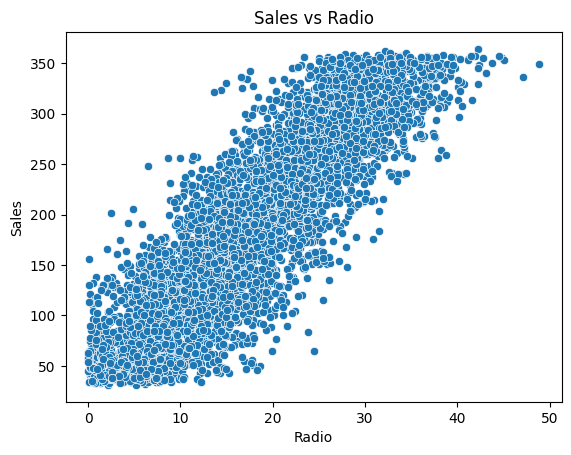

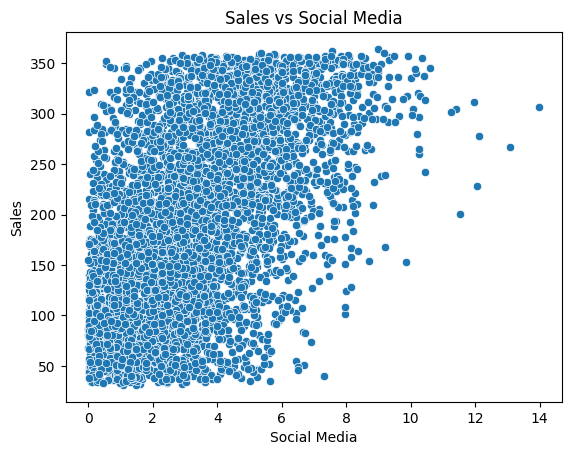

In [20]:


cols = ['TV', 'Radio','Social Media']

for col in cols:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['Sales'])
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.title(f'Sales vs {col}')
    plt.show()


In [21]:
df.head
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


In [23]:
X = df[['TV','Radio','Social Media']].copy()
X['Bias'] = 1
X.head(10)

Y = df[['Sales']]
Y.head(10)

,Sales
0,54.732757
1,46.677897
2,150.177829
3,298.246340
4,56.594181
5,105.889148
6,198.679825
7,108.733932
8,270.189400
9,48.280582


In [24]:
T = len(df)
train = 0.8
test = 1 - train
X_train = (X.loc[:T*train])#train-test split
Y_train = (Y.loc[:T*train])
X_test = (X.loc[T*train+1:])
Y_test = (Y.loc[T*train+1:]).to_numpy()

In [25]:

np.isfinite(Y).all()
print(np.isnan(Y).sum())
print(np.isinf(Y).sum())
np.where(~np.isfinite(Y))


Sales    0
dtype: int64
Sales    0
dtype: int64


(array([], dtype=int64), array([], dtype=int64))

In [26]:
def fit(X_train,Y_train,batch_size = 30, learning_rate = 0.0001,iterations = 10000,learning_rate_factor = 0.2):
    X_train = X_train.to_numpy()
    Y_train = Y_train.to_numpy()
    features = X_train.shape[1]
    data_size = len(X_train)
    #print(X_train@theta - Y_train)
    global theta#temporary to store learned paramters
    theta = np.random.rand(features,1)#initizalize random weights
    #print(np.mean((X_train @ theta - Y_train)**2))

    for i in range(iterations):
        print(i,np.mean((X_train @ theta - Y_train)**2))#print mse
        for j in range(int(data_size/batch_size)):
            error = X_train[batch_size*j:batch_size*(j+1)]@theta - Y_train[batch_size*j:batch_size*(j+1)]#find error for this batch
            error = error.reshape(-1)#convert to series
            for k in range(features):
                grad_k = np.dot(error,X_train[batch_size*j:batch_size*(j+1),k])/batch_size#find grad for this batch and feature(from differentiating equation)
                grad_k = np.clip(grad_k, -1000, 1000)#stop gradients from going insanely high
                theta[k] = theta[k] - learning_rate*grad_k/(1+i**learning_rate_factor)#update theta for feature(had to divide to stop oscillations)
                #ignore this - was to do it without using the equation and directly finding grad by finding loss at two separate values
                #print( learning_rate*grad_k)
                #dtheta = np.zeros([features,1])
                #dtheta[k] = h
                #Loss_plus = np.linalg.norm(X_train[batch_size*j:batch_size*(j+1)] @ (theta+dtheta) - Y_train[batch_size*j:batch_size*(j+1)])
                #Loss_minus = np.linalg.norm(X_train[batch_size*j:batch_size*(j+1)] @ (theta-dtheta) - Y_train[batch_size*j:batch_size*(j+1)])

            #print(batch_size*j,Loss.shape,batch_size*(j+1))

        error = X_train[batch_size*int(data_size/batch_size):] @ theta - Y_train[batch_size*int(data_size/batch_size):]#same for remaining
        error = error.reshape(-1)
        r = data_size - batch_size * int(data_size / batch_size)
        if(r == 0):#prevent division by zero
            continue
        for k in range(features):
                
                grad_k = np.dot(error,X_train[batch_size*int(data_size/batch_size):,k])/r
                grad_k = np.clip(grad_k, -1000, 1000)
                theta[k] = theta[k] - learning_rate*grad_k/(1+i**learning_rate_factor)
        #print(batch_size*int(data_size/batch_size),Loss.shape)

In [27]:
def predict(X_test):
    X = X_test.to_numpy()
    y_pred = X @ theta
    return y_pred

In [36]:
fit(X_train,Y_train,30,0.0006,2000,0.75)
Y_pred = predict(X_test)


0 30720.56506146935
1 460.92776750099745
2 18.47456574335526
3 11.860225838061918
4 10.259617607532684
5 9.68112263956815
6 9.417993328869487
7 9.276330023709942
8 9.189226570713107
9 9.129801791172534
10 9.085936516098752
11 9.05162413147365
12 9.023633702243096
13 9.000096615768314
14 8.979859997982523
15 8.962170687360471
16 8.946511469129602
17 8.932511607669564
18 8.919895547976076
19 8.908452163142224
20 8.898015546814559
21 8.888452556226273
22 8.879654451242796
23 8.871531105731421
24 8.864006886725397
25 8.857017647207236
26 8.850508482809257
27 8.844432025587388
28 8.838747123892556
29 8.833417805441366
30 8.828412451900057
31 8.823703134026086
32 8.819265070474483
33 8.815076183105704
34 8.8111167284889
35 8.80736899020785
36 8.803817020153277
37 8.800446419626832
38 8.79724415305733
39 8.794198388626317
40 8.79129836124558
41 8.788534254215016
42 8.785897096581538
43 8.783378673764423
44 8.78097144944492
45 8.778668497064356
46 8.776463439553037
47 8.774350396138892
48 8.77

In [37]:
print(np.var(Y_train))
print(np.sqrt(np.mean((Y_pred - Y_test)**2)))#rmse on test data

Sales    8676.189444
dtype: float64
2.9914394885873423


/home/vidhaan/venvs/my_genai/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
